# Task 1: Energy Balance Model (including the Greenhouse Effect) Version 1

Georgina Gomes GMSGEO001


Develop Version 1 of the Energy Balance Model (EBM1) by solving the
following equation:


$S(1-\alpha) = 4\epsilon \sigma T^4$


where symbols have their standard meaning and values, as discussed in the
class.


- Plot graphs demonstrating the sensitivity of global temperature to each climate forcing (i.e., solar albedo and emissivity), using realistic ranges (0.1 to 0.9).
- Use the graphs to determine the percentage change required in the present value of each forcing to reduce the global temperature to 0°C.
- Calculate the percentage change in emissivity needed to increase global temperature by 3°C (global warming) relative to pre-industrial values, and the percentage increase in albedo required to offset this warming
- Discuss the limitations of using this model for climate change study

In [73]:
import numpy as np
import matplotlib.pyplot as plt

### a) Plot graphs demonstrating the sensitivity of global temperature to each climate forcing (i.e., solar albedo and emissivity), using realistic ranges (0.1 to 0.9)

Energy radiated by earth = energy absorbed by earth

$S(1-\alpha)\pi R^2 = 4\pi R^2 \epsilon \sigma T^4$

$\pi R^2$ cancels out and gives us the above equation

Making T the subject of this equation we have:

### $T = \sqrt[4]{\frac{S(1-\alpha)}{4\epsilon \sigma}}$

This indicates that the temperature of the earth depends on only three variables: solar radiation (S), planetary albedo ($\alpha$) and emissivity of the system ($\epsilon$). 


In [74]:
def ebm1(S, alpha, sigma, emissivity):
    T = ((S*(1-alpha))/(4*emissivity*sigma))**0.25  #calculates temperature in kelvin
    return T - 273.15  #convert kelvin to degrees celsius

In [75]:
S = 1372
alpha = 0.3
sigma = 0.0000000567
emissivity = 0.61
ebm1(S,alpha, sigma, emissivity)

15.498840006518606

We will now use this function to plot the temperature for a range of solar albedo and emissivity values in realistic ranges

## Temperature against Planetary Albedo

In [76]:
def plot_temperature_against_albedo(S, alpha, sigma, emissivity):
    
    T = np.zeros(len(alpha))
    
    for i, a in enumerate(alpha):
        T[i] = ebm1(S, a, sigma, emissivity)
    
    
    plt.plot(alpha, T)
    plt.xlabel(r"$Albedo (\alpha)$")
    plt.ylabel(r"$Temperature (^\circ\text{C})$")
    plt.title('Temperature vs Albedo')
    plt.grid(True)
    plt.axhline(y=0.0, color='red', linestyle='--', label=r"$0^\circ\text{C}$")
    plt.legend()
    plt.show()

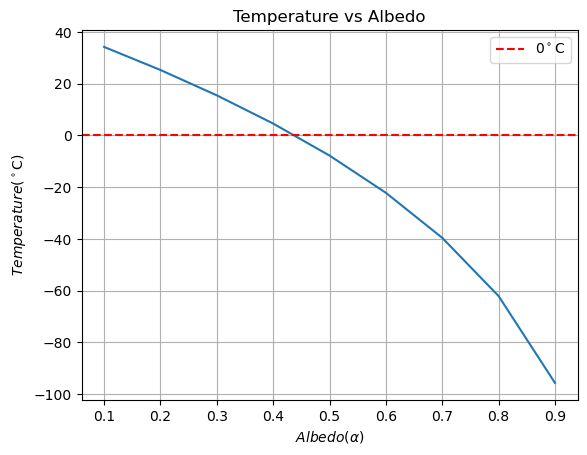

In [77]:
S = 1372
alpha = np.arange(0.1, 1.0, 0.1)
sigma = 0.0000000567
emissivity = 0.61
plot_temperature_against_albedo(S, alpha, sigma, emissivity)

## Temperature against Emissivity

In [78]:
S = 1372
alpha = 0.3
sigma = 0.0000000567
emissivity = np.arange(0.1, 1.0, 0.1)


def plot_temperature_against_emissivity(S, alpha, sigma, emissivity):
    T = np.zeros(len(emissivity))
    
    for i, e in enumerate(emissivity):
        T[i] = ebm1(S, alpha, sigma, e)
    
    
    plt.plot(emissivity, T)
    plt.xlabel(r"$Emissivity (\epsilon)$")
    plt.ylabel(r"$Temperature (^\circ\text{C})$")
    plt.title('Temperature vs Emissivity')
    plt.axhline(y=0.0, color='red', linestyle='--', label=r"$0^\circ\text{C}$")
    plt.legend()
    plt.grid(True)
    plt.show()

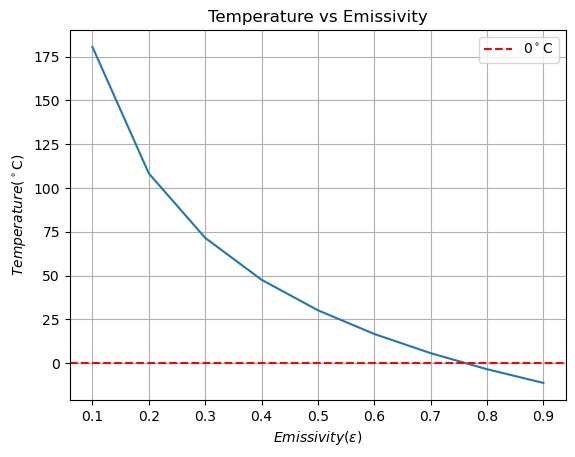

In [79]:
S = 1372
alpha = 0.3
sigma = 0.0000000567
emissivity = np.arange(0.1, 1.0, 0.1)
plot_temperature_against_emissivity(S, alpha, sigma, emissivity)

### Part 2: Use the graphs to determine the percentage change required in the present value of each forcing to reduce the global temperature to 0°C.

### Emissivity

In [80]:
# Percentage change calculation function
def calculate_percentage_change(normal, new):
    percentage_change = ((new-normal)/normal)*100
    return round(percentage_change, 0)

#### The graph shows that at $\epsilon \approx 0.76$, the temperature becomes $0^\circ\text{C}$. This is approximately a 25% increase. The percentage change is calculated below:

In [81]:
print(calculate_percentage_change(0.61, 0.76))

25.0


## Albedo

#### For albedo, it looks like at $\alpha \approx 0.43$, temperature becomes $0^\circ\text{C}$. This is approximately a 43% increase (calculated below).

In [82]:
print(calculate_percentage_change(0.3, 0.43))

43.0


## Part 3: Calculate the percentage change in emissivity needed to increase global temperature by 3°C (global warming) relative to pre-industrial values, and the percentage increase in albedo required to offset this warming

Pre-industrial global temperature $\approx 13.7^\circ\text{C} $. Global warming level is therefore $\approx 16.7^\circ\text{C}$. This is 286.85 Kelvin and 289.85 Kelvin respectively.

In [88]:
S = 1372
alpha = 0.3
sigma = 0.0000000567
global_warming_T = 289.85
pre_industrial_T = 286.85

def compute_emissivity(T, alpha, S, sigma):
    return ((1-alpha)*S)/(4*sigma*T**4)

global_warming_emissivity = compute_emissivity(global_warming_T, alpha, S, sigma)
emissivity_percentage_change = calculate_percentage_change(0.61, global_warming_emissivity)

print("Global warming emissivity:", global_warming_emissivity)
print("Percentage change in emissivity needed for global warming temperature:", emissivity_percentage_change)



def compute_albedo_offset_percentage_change(T, emissivity, S, sigma):
    global_warming_albedo_offset = 1 - ((4*emissivity*sigma*T**4)/S)
    return calculate_percentage_change(0.3,global_warming_albedo_offset)

albedo_offset = compute_albedo_offset_percentage_change(pre_industrial_T, global_warming_emissivity, S, sigma)
print("Percentage increase in albedo required to offset warming:", albedo_offset)

Global warming emissivity: 0.5999511392273484
Percentage change in emissivity needed for global warming temperature: -2.0
Percentage increase in albedo required to offset warming: 10.0


## Part 4: Discuss the limitations of using this model for climate change study

This model is a very simplified version of events so using it for in depth climate change study is not super realistic but still very beneficial. The main limitation is that this model is missing the element of time which is key in climate change study for knowing how quickly we must act. The model is also missing a spatial element which means its only valid really for one point in time and space which is not extremely useful. We are taking assuming constant values here for each variable but in reality that is not the case.